<a href="https://colab.research.google.com/github/vineet2508/Analysis-of-covid-19-in-India/blob/master/EDA_on_IPL_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA on IPL DataSet**


## Objectives:


*   To find the team that won the most number of matches in a season.
*   To find the team that lost the most number of matches in a season.


*   Does winning toss increases the chances of victory.
*   To find the player with the most player of the match awards.


*   To find the city that hosted the maximum number of IPL matches.
*   To find the most winning team for each season.


*   To find the on-field umpire with the maximum number of IPL matches.
*   To find the biggest victories in IPL while defending a total and while chasing a total.









### Importing nessesary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

So there are 636 rows and 18 columns. 636 rows imply that there were 636 IPL matches held between 2008 and 2016.

In [6]:
df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [7]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


## Observations:
The following inferences can be made from the describe() method:


*   The biggest margin of victory for the team batting first(win_by_runs) is by 146 runs.
*   The biggest victory of the team batting second(win_by_wickets) is by 10 wickets.


*   75% of the victorious teams that bat first won by margin of 20 runs.
*   75% of the victorious teams that bat second won by margin of 6 wickets.


*   There were 636 IPL matches hosted from 2008 to 2016.







In [8]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [9]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

The column ‘umpire3’ has a significant number of NaN values. As the off-field umpire parameter is insignificant, we can drop this column. The other columns that have Nan values are of type object(Pandas equivalent of Python String data type) and are very few in number(<=7).

In [10]:
df=df.drop(columns=['umpire3'],axis=1)

## Exploratory Analysis and Visualisation
Now that our dataset has benn cleaned up, it's time to do the in-depth analysis and visualisation.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.color_palette("Paired")
plt.rcParams['font.size']=14
plt.rcParams['figure.figsize']=(12,8)
plt.rcParams['figure.facecolor']='#00000000'

### The team with the most number of wins per season

In [12]:
teams_per_season = df.groupby('season')['winner'].value_counts()
teams_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2017    Sunrisers Hyderabad             8
        Kings XI Punjab                 7
        Delhi Daredevils                6
        Gujarat Lions                   4
        Royal Challengers Bangalore     3
Name: winner, Length: 84, dtype: int64

In [13]:
year=2008
win_per_season_df=pd.DataFrame(columns=['year','team','wins'])
for items in teams_per_season.iteritems():
  if items[0][0]==year:
    #print(items)
    win_series = pd.DataFrame({
        'year' : [items[0][0]],
        'team' :[items[0][1]],
        'wins' : [items[1]]
    })
    win_per_season_df = win_per_season_df.append(win_series)
    year+=1

In [14]:
win_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


The number of wins is a discrete value. Hence, we will plot a bar chart(barplot in Seaborn).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


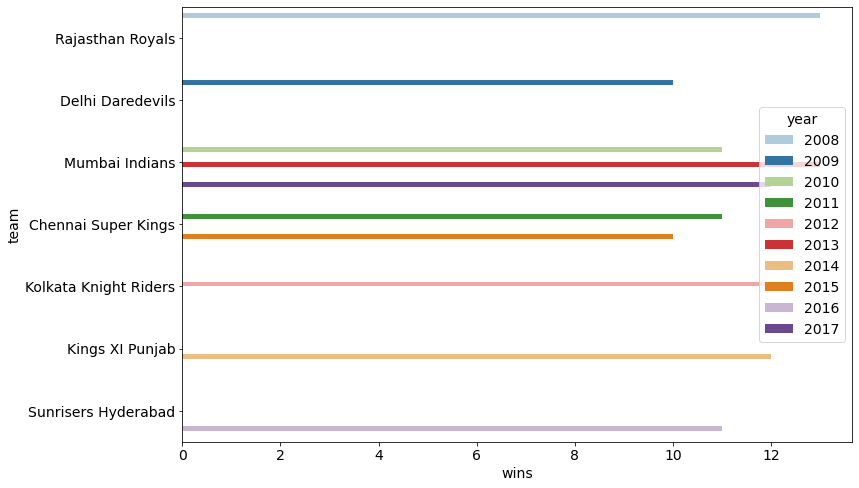

In [15]:
sns.barplot('wins', 'team', hue='year', data=win_per_season_df, palette='Paired')

From the barplot, we can easily make inferences regarding the year in which a particular team has scored the maximum wins(and also the number of wins).
## Observation


*   Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019).



### The venue that hosted the maximum number of matches

In [16]:
venue_ser = df['venue'].value_counts()

In [18]:
 venue_df = pd.DataFrame(columns=['venue','matches'])
 for items in venue_ser.iteritems():
   temp_df = pd.DataFrame({
       'venue':[items[0]],
       'matches':[items[1]]
   })
   venue_df=venue_df.append(temp_df,ignore_index=True)

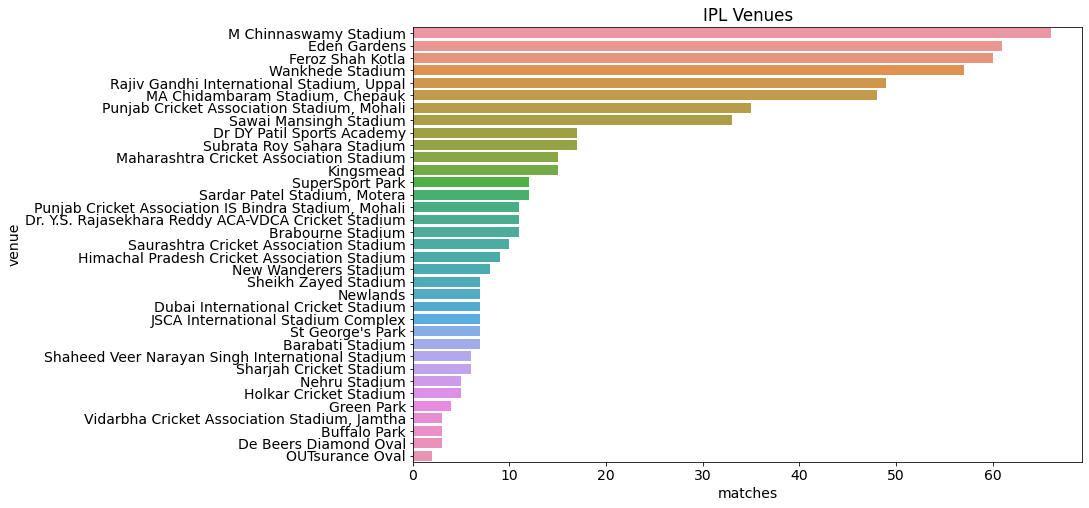

In [19]:
plt.title("IPL Venues")
sns.barplot(x='matches',y='venue',data=venue_df)

## Observation


*   M Chinnaswamy Stadium has hosted the maximum number of IPL matches followed by Eden Garden and Firoz shah Kotla
*   Till 2016, IPL matches were hosted by 35 venues.



## The most successful IPL team
In a game of sports, every team competes for victory. Hence, the team that has registered the most number of victories is the most successful.

In [20]:
team_wins_ser = df['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)

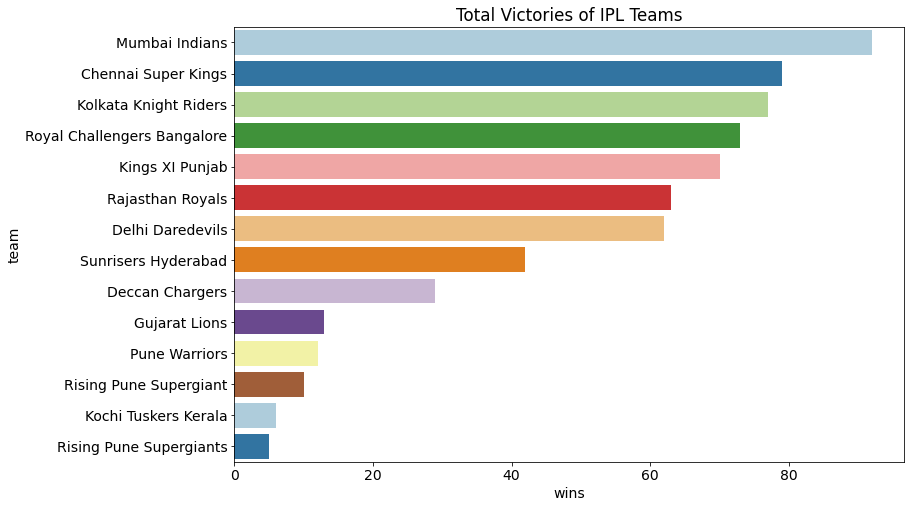

In [21]:
plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=team_wins_df, palette='Paired')

## Observation

*   Mumbai Indians is the most successful team(as they have won the maximum number of IPL matches -92) followed by Chennai Super Kings and Kolkata Knight Riders.



## Most Valuable Player
Winning matters the most in a competitive league match. If a player makes the most significant contribution to his team’s victory, then he’s chosen as the player_of_match. The player who has won the player_of_match title on most occasions is the most valuable player.

In [27]:
mvp_ser = df['player_of_match'].value_counts()

mvp_ten_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_df = mvp_ten_df.append(temp_df2, ignore_index=True)
        count += 1    
mvp_ten_df

,player,wins
0,CH Gayle,18
1,YK Pathan,16
2,DA Warner,15
3,AB de Villiers,15
4,RG Sharma,14
5,SK Raina,14
6,G Gambhir,13
7,MS Dhoni,13
8,AM Rahane,12
9,MEK Hussey,12


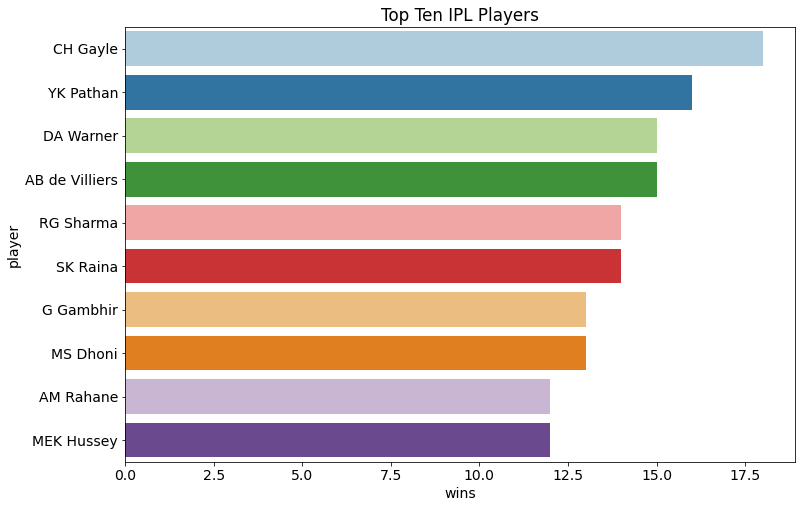

In [28]:
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=mvp_ten_df, palette='Paired')

## Observations:


*   Cris Gayle is the player who won the most player of the match awards and hence is the most valuable player.
*   Six Indian players have figured in the top ten IPL players list.




### The team that won the most number of toss

In [30]:
toss_ser = df['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True) 
toss_df

,team,wins
0,Mumbai Indians,85
1,Kolkata Knight Riders,78
2,Delhi Daredevils,72
3,Royal Challengers Bangalore,70
4,Kings XI Punjab,68
5,Chennai Super Kings,66
6,Rajasthan Royals,63
7,Deccan Chargers,43
8,Sunrisers Hyderabad,35
9,Pune Warriors,20


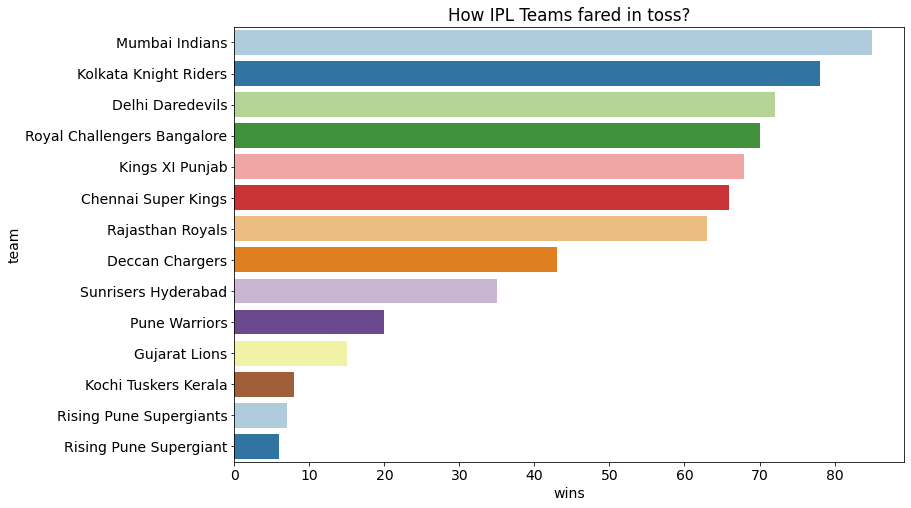

In [31]:
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired')

## Observations:

*   Mumbai Indians has won the most toss(till 2016) in IPL history.
*   All the top teams in IPL are successful in winning the toss as well.



# Thank You